# Data Analysis and Preparation

### Importing libraries and data

In [41]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [42]:
with open('data/test_data.pkl', 'rb') as handle:
    data = pickle.load(handle)

### Exploratory Data Analysis

In [43]:
data.shape

(3599, 2)

In [44]:
data.head()

,Values,Timestamps
0,105.0,2021-01-24 01:39:00+00:00
1,80.0,2021-01-24 01:40:00+00:00
2,93.0,2021-01-24 01:41:00+00:00
3,88.0,2021-01-24 01:42:00+00:00
4,74.0,2021-01-24 01:43:00+00:00


In [45]:
data.tail()

,Values,Timestamps
3594,178.0,2021-01-26 13:33:00+00:00
3595,206.0,2021-01-26 13:34:00+00:00
3596,225.0,2021-01-26 13:35:00+00:00
3597,186.0,2021-01-26 13:36:00+00:00
3598,252.0,2021-01-26 13:37:00+00:00


From this analysis, i see that the data is from a time serie with 3599 registers.

I will explore the columns data types

In [46]:
data.dtypes

Values        float64
Timestamps     object
dtype: object

The 'timestamps' column type is string

In [47]:
data.isna().sum()

Values        0
Timestamps    1
dtype: int64

There are 1 NaN in the 'Timestamps' column. It may be due to an error when entering the data, so I'm going to drop this column

In [48]:
data = data.dropna()

In [49]:
data.isna().sum()

Values        0
Timestamps    0
dtype: int64

Now the data doesnt have NaNs

### Data Preparation

I will convert the 'Timestamps' column from strings to datetime type.

In [50]:
data_copy = data.copy()

When i tried to convert the 'Timestamps' column to datetime type, i found an unknown string format ('Data Sucia'), so i will drop it.

In case of a production algorithm entering data, i will previously try to match a regex to avoid this kind of problems

In [51]:
data_copy = data_copy[data_copy.Timestamps != 'Data Sucia']

In [52]:
data_copy['Timestamps'] = pd.to_datetime(data_copy['Timestamps'], utc=True)

In [53]:
data_copy.dtypes

Values                    float64
Timestamps    datetime64[ns, UTC]
dtype: object

Now the 'Timestamp' column is in the correct type

Now i will make the 'Timestamp' column, the index of the dataframe

In [54]:
data_final = data_copy.set_index('Timestamps')

In [55]:
data_final.sample(5, random_state=0)

,Values
Timestamps,
2021-01-24 13:35:00+00:00,126.0
2021-01-25 18:19:00+00:00,436.0
2021-01-24 06:50:00+00:00,23.0
2021-01-25 05:14:00+00:00,61.0
2021-01-26 03:23:00+00:00,104.0


### Data Visualization and analysis

Simple plot

In [56]:
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:xlabel='Timestamps'>

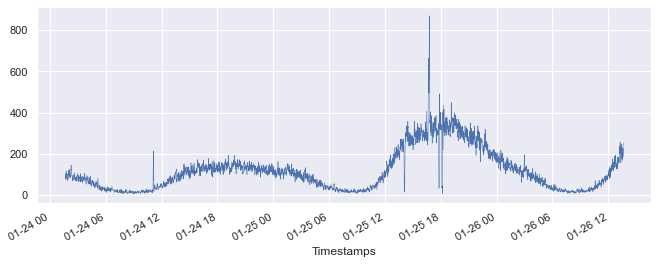

In [57]:
data_final['Values'].plot(linewidth=0.5)

There are some peaks, and various changes in the slope

Interactive plot

I will plot an interactive graphic to find the date and values of the peaks, and the dates where the slope changes. I prefer to do that instead of some slicing plots.

In [58]:
fig = px.line(data_final, y="Values")
fig.show()

Peak values and slope changes date:
</div>
<table style="float: left", width=50%>
  <tr>
    <th>Date</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Jan 24, 2021, 11:08</td>
    <td>214</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 14:08</td>
    <td>14</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 16:49</td>
    <td>869</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 17:49</td>
    <td>32</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 18:12</td>
    <td>7</td>
  </tr>
</table>
</dib>


</div>
<table style="float: right",  width=40%>
  <tr>
    <th>Date</th>
    <th>Slope change to</th>
  </tr>
  <tr>
    <td>Jan 24, 2021, 11:20</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 03:34</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 10:05</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>Jan 25, 2021, 19:55</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>Jan 26, 2021, 10:01</td>
    <td>Positive</td>
  </tr>
</table>
</dib>

Sesionality

In [59]:
data_copy_2 = data_final.copy()

In [60]:
data_copy_2['day'] = data_copy_2.index.day
data_copy_2['hour'] = data_copy_2.index.hour

Boxplot by day

<AxesSubplot:xlabel='day', ylabel='Values'>

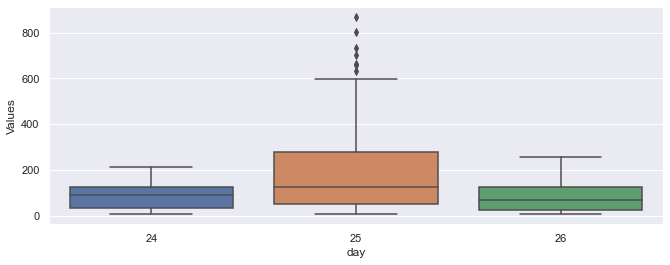

In [61]:
sns.boxplot(x = 'day', y= 'Values', data = data_copy_2)

The Jan 25 has the highest median and interquartile range. This day has also the biggest value.

Boxplot by hour

<AxesSubplot:xlabel='hour', ylabel='Values'>

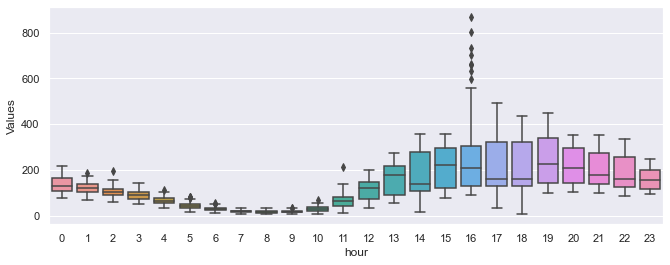

In [62]:
sns.boxplot(x = 'hour', y= 'Values', data = data_copy_2)

Between the 14 and 21 hours the interquartile range is the biggest. The 16 hour has the biggest value. The 15 hour has the biggest median.

Resampling plot

<AxesSubplot:>

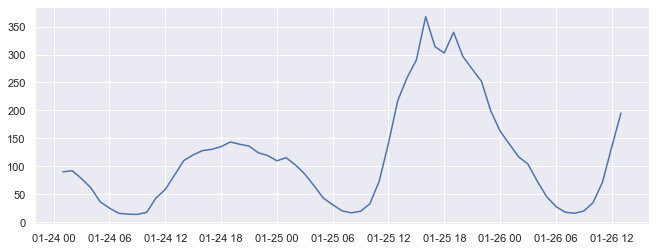

In [63]:
resampled = data_final['Values'].resample('H').mean() 
sns.lineplot(data = resampled)

This graphic is less "noisy" than the basic plot because it averages the values per hour, but the peaks tends tends to increase or decrease the mean.

Moving average plot

<AxesSubplot:>

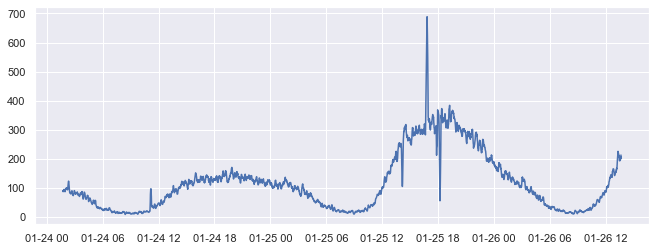

In [64]:
ma = data_final['Values'].rolling(window = 7).mean() 
sns.lineplot(data = ma)

This graph has smoothed variations unlike the original graph. Where, the data is less noisy but maintains the shape of the original series.

Bar plot

<AxesSubplot:xlabel='hour', ylabel='Values'>

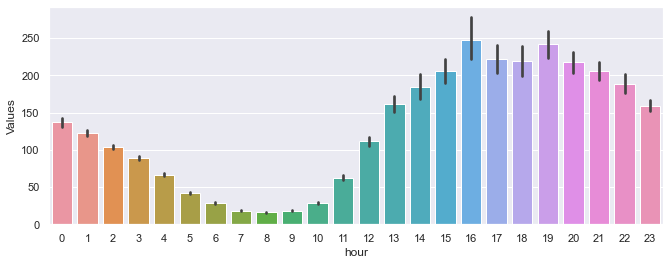

In [65]:
sns.barplot(x = 'hour', y = 'Values', data = data_copy_2)

<AxesSubplot:xlabel='day', ylabel='Values'>

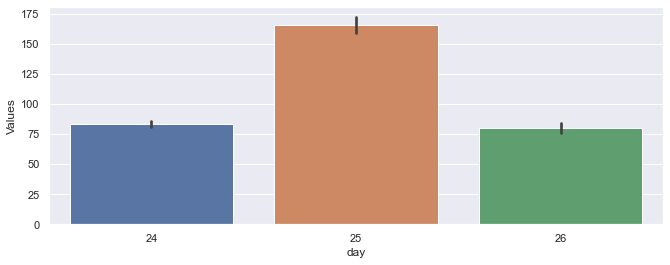

In [66]:
sns.barplot(x = 'day', y = 'Values', data = data_copy_2)

### Exporting prepared data

In [67]:
with open('data/prepared_test_data.pkl', 'wb') as f:
    pickle.dump(data_final, f)

### Insights

From the exploratory data analysis, i saw that the data is from a time series, and the timestamps columns was string data type. Also in this column, there was a NaN and a bad string. This may be due to a lack of validation in the data entry, or a typo.

When i graphed the data, i saw some peak and changes in the slopes. Because i dont have any backround of this data, i dont know if this peaks are possibles or if they are outliers, because this values significantly differ from the patterns and trends of the other values in the time series.

From the boxplot graphics, i see that the Jan 25 has the biggest range of values and the biggest median. Between the 14 and 21 hours, the interquartile range is the biggest. The bar plot graphics provide similar information information (values per day and hour)